In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from GRDECL2VTK import *

In [2]:
#Model=GeologyModel(filename='./ExampleData/Simple3x3x1.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_Flat_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_FlatCross_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/40X48x1_3fatults.grdecl')
#Model=GeologyModel(filename='./ExampleData/snarkgrid.grdecl')
Model=GeologyModel(filename='./ExampleData/dome.grdecl')
#Model=GeologyModel(filename='./ExampleData/pillar_36x48.grdecl')
#Model=GeologyModel(filename='./ExampleData/Johansen.grdecl')
#Model=GeologyModel(filename='./ExampleData/Norne.GRDECL')

Model.GRDECL2VTK()
Model.Write2VTU()

[Input] Reading ECLIPSE/PETREL file "./ExampleData/dome.grdecl" ....
     Grid Dimension(NX,NY,NZ): (20 x 20 x 4)
     NumOfGrids=1600
     NumOfKeywords=11
     Reading Keywords [SPECGRID]      [PORO]      [PERMX]      [PERMY]      [PERMZ] .....Done!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 12800
     NumOfCells 1600
.....Done!
[Output] Writing "Results\dome.vtu" Paraview file....Done!


[FaultProcess] Found 7 faults.
Added 1 new intersection pts
[FaultProcess] Domain is splitted as 6 polygons.


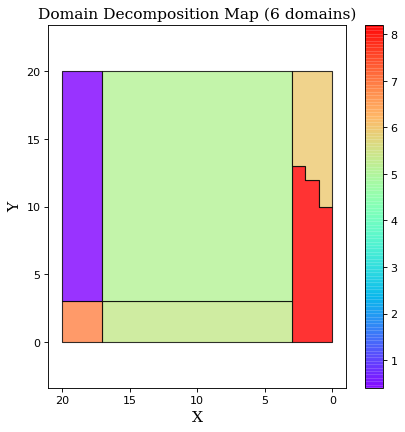

[Output] Writing "Results\dome.vtu" Paraview file....Done!


In [3]:
Model.decomposeModel()
Model.Write2VTU()